In [80]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import finpy_tse as fpy
import pytse_client as tse
import yfinance as yf
import ta 
import requests
import asyncio
import math as math

In [81]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense , LSTM
plt.style.use('fivethirtyeight')


In [82]:
last_day =datetime.now()
last_day=last_day.date()
last_day=str(last_day)
last_day

'2024-05-24'

In [83]:
count=750   # tedad candle data

In [84]:
n = 400   #  tedad rooz data baraye train    mitavanad natije ro behbood ya kahesh dahad bana be noo daraie

In [85]:


#fpy>>>>> index tepix

def index_kol(bars:int=9500):
        while True:
            try:
                data=fpy.Get_CWI_History(ignore_date=True,double_date=True)
                data=data.iloc[:-bars:-1][::-1]
                data.index=data['Date']
                header = {'User-Agent': "ADN"}
                adres = 'http://cdn.tsetmc.com/api/Index/GetIndexB1LastDay/32097828799138957'
                darkhast = requests.get(url=adres, headers=header).text.split('},{')

                for a in darkhast:
                    close_tepix = int(a.split('xDrNivJIdx004":')[1].split('.')[0])
                    high_tepix = int(a.split('xPhNivJIdx004":')[1].split('.')[0])
                    low_tepix = int(a.split('xPbNivJIdx004":')[1].split('.')[0])
                    open_tepix = int(darkhast[7].split('xDrNivJIdx004":')[1].split('.')[0])
                    
                formatted_date = pd.to_datetime(last_day)
                # اطلاعات خود را به صورت یک دیکشنری تعریف می‌کنیم
                data_tepix = {
                    'Date':[formatted_date],
                    'Open':[open_tepix],
                    'High':[high_tepix],
                    'Low':[low_tepix],
                    'Close':[close_tepix],
                    'Adj Close':[close_tepix],
                    'Volume':0,  }
                # دیکشنری را به DataFrame تبدیل می‌کنیم
                instant_tepix = pd.DataFrame(data_tepix)
                instant_tepix.index=instant_tepix['Date']
                instant_tepix = pd.DataFrame(instant_tepix)
                instant_tepix = pd.concat([instant_tepix, data])
                instant_tepix = instant_tepix.sort_index(ascending=True)
                
                if  (instant_tepix.iloc[-1]['Close'] == instant_tepix.iloc[-2]['Close']  )   or  (  abs(instant_tepix.iloc[-1]['Close'] - instant_tepix.iloc[-2]['Close']  ) < 2   or  (instant_tepix.index[-1]== instant_tepix.index[-2] )):
                    instant_tepix = instant_tepix.iloc[:-1]
                return(instant_tepix)
            except Exception as e:
                print(f"An error occurred: {e}")
                asyncio.sleep(2)  # Sleep for 10 seconds before retrying



df=index_kol()
# symbol_data=symbol_data.loc[strat_back_test:end_backtest]
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315


In [86]:
df=df.tail(count)
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-04-07,2021-04-07,1258600.0,1258600.0,1249890.0,1249898.0,1249910.4,1068639226
2021-04-10,2021-04-10,1246740.0,1246740.0,1240750.0,1240759.0,1240696.7,588396551
2021-04-11,2021-04-11,1237340.0,1237340.0,1230920.0,1230927.0,1230876.5,1265213974
2021-04-12,2021-04-12,1228760.0,1228760.0,1225810.0,1226119.0,1226158.2,2409026367
2021-04-13,2021-04-13,1234640.0,1245540.0,1234640.0,1244587.0,1244556.7,5631017338
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315


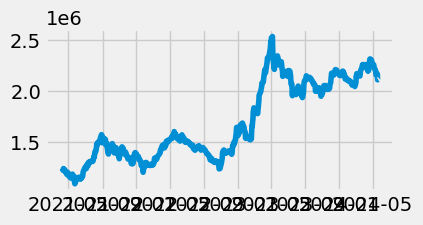

In [87]:
plt.figure(figsize=(4,2))
plt.plot(df['Close'])
plt.show()


In [88]:

data=df.filter(['Close'])
dataset=data.values


In [89]:

training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data


array([[0.10710033],
       [0.10075164],
       [0.09392154],
       [0.09058152],
       [0.10341088],
       [0.10247237],
       [0.09586457],
       [0.08964995],
       [0.0841328 ],
       [0.08609805],
       [0.07734368],
       [0.07197796],
       [0.06397594],
       [0.06335975],
       [0.07426972],
       [0.07778758],
       [0.06848025],
       [0.05903606],
       [0.04956339],
       [0.05315906],
       [0.04985863],
       [0.03900424],
       [0.04301186],
       [0.05827816],
       [0.06130836],
       [0.06515967],
       [0.06466089],
       [0.05484297],
       [0.05405312],
       [0.04101535],
       [0.02253406],
       [0.00845704],
       [0.        ],
       [0.0067523 ],
       [0.00947823],
       [0.03039576],
       [0.04249085],
       [0.03490424],
       [0.03110225],
       [0.0367764 ],
       [0.04272496],
       [0.04504449],
       [0.03898271],
       [0.03414148],
       [0.03165244],
       [0.03785246],
       [0.03781356],
       [0.036

In [90]:

training_data=scaled_data[0:training_data_len , :]


In [91]:

xtrain=[]
ytrain=[]




In [92]:


for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])


In [93]:

xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape


(200, 400, 1)

In [94]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(loss='mean_squared_error',optimizer='adam')


In [96]:
tekrar=30          #  tedad tekrar baraye afzayesh deghat  (tedad bar oboor az shabake asabi)




model.fit(xtrain,ytrain,epochs=tekrar,batch_size=1)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0422
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0051
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0047
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0029
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0031
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0022
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0026
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0019
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0021
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0024
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0015
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - loss: 0.0015
Epoch 13/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.0012
Epoch 14/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - loss: 0.0014
Epoch 15/30
200/200 ━━━━━━━━━

In [97]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])



In [98]:

xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))


In [99]:

prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))
rmse


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


23933.572995041053

In [100]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction.astype(int)


C:\Users\MSI\AppData\Local\Temp\ipykernel_13012\1292521100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction.astype(int)


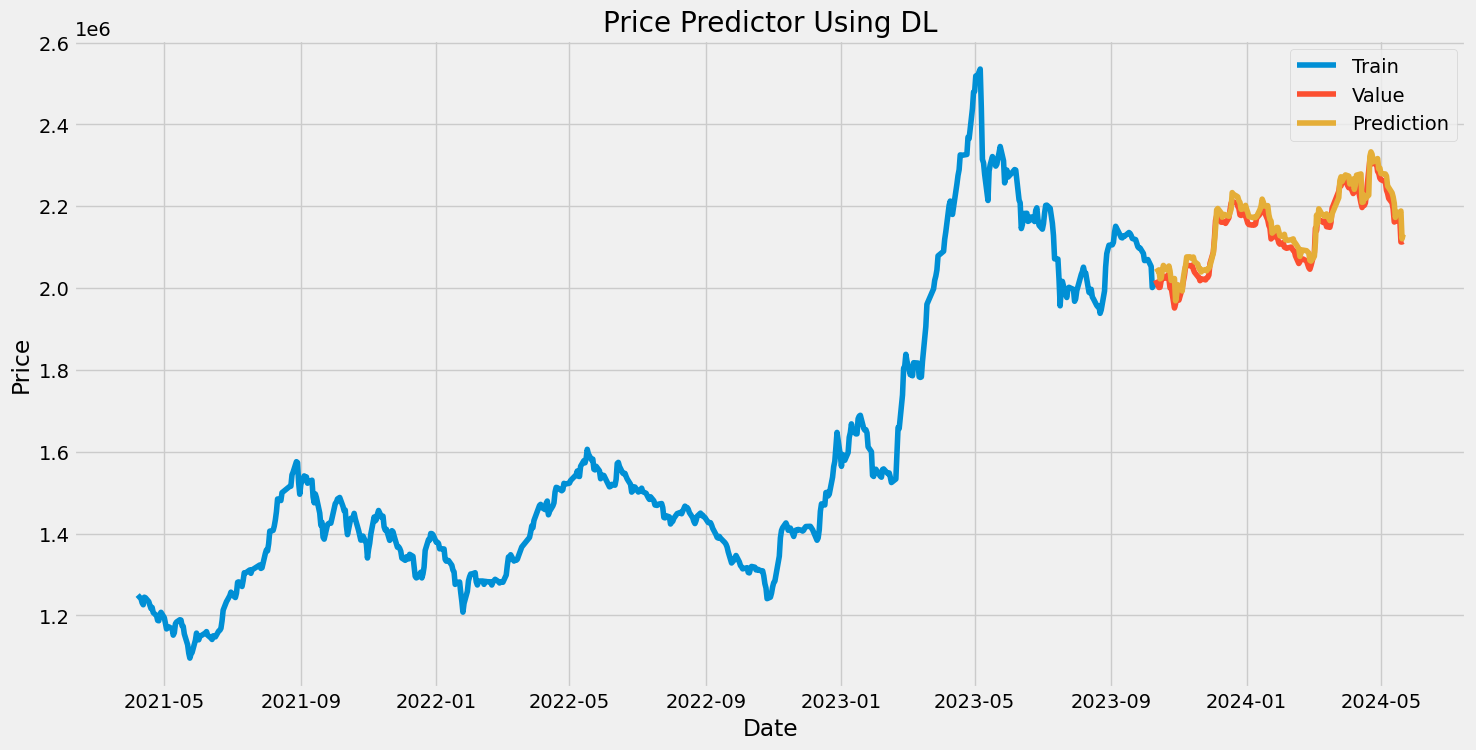

In [101]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()


In [102]:
valid


,Close,prediction
Date,,
2023-10-11,2019713.0,2039044
2023-10-14,2001463.0,2044447
2023-10-15,2001943.0,2022490
2023-10-16,2018166.0,2023916
2023-10-17,2031245.0,2042473
...,...,...
2024-05-15,2164692.0,2185048
2024-05-18,2168676.0,2183924
2024-05-19,2112560.0,2188312


In [103]:

newdf=data[-n:].values
scalednewdf=scaler.transform(newdf)


In [104]:

xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))


In [105]:

pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
print('Next Day Prediction:  ' , pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Next Day Prediction:   [[2135024.2]]


In [106]:
print('darsad khata ehtemali    :' , ((rmse/pred)*100), "%" )

darsad khata ehtemali    : [[1.1209977]] %
